# 预测机器人耗电性能的实验
* 使用多重线性回归模型
* 8000组数据训练模型，另外8000组独立的测试数据用来检测模型符合的程度
* 实验大概意思就是用以往的数据，建立机器人关节角度，移动速度和加速度，承压能力能等属性和机器人活动时电流量之间的多重线性关系，然后用这个模型来预测生产出的机器人耗电量，作为一个性能指标
* 以下是实验内容：


# Load and Visualize the Data
* 加载训练模型的数据，格式为csv
* 分隔符为逗号（默认）
* 手动添加列名
* 加载前六行数据，检查一下是否和原始数据一样

In [15]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model


# specify header
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]

# load train data
df_tr = pd.read_csv('/Users/Lovely-white/JupyterNotebook/'+
                    'Lab2 - Multiple Linear Regression/robot_train.csv',
                     header=None,names=names,na_values='?')
# check train data
df_tr.head(6)

,t,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
0,0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
1,0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
2,0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
3,0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
4,0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01
5,0.05,-0.000007,2.4958,-1.1345,-1.521500e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.164600e-20,-1.141292e-321,2.930300e-01


* 目标向量是列名为"I2"的属性，对应机器人第二个关节的电流量
* 这一部分是观察I2和时间t是否有一些相关性
* 画完图发现，好像并没有= =，所以后面建立多重线性模型的时候没有把t选为一个特征

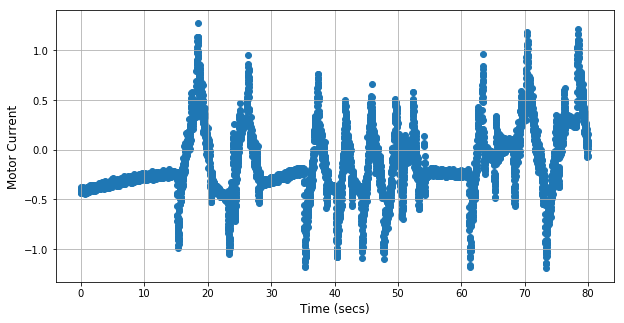

In [14]:
# a graph of time(t) and the current into the second joint(I2)
t = np.array(df_tr['t'])
y = np.array(df_tr['I2'])
plt.figure(figsize=(10,5))
plt.figure(1) 
plt.scatter(t,y,lw=1)
plt.grid()
plt.xlabel('Time (secs)', fontsize=12)
plt.ylabel('Motor Current', fontsize=12)

* 当然我们也可以看一下其他列（属性）和目标（I2）的关系
* 重复上面的步骤，看看第二个关节角度（q2）和目标的关系，发现不错哦
* 和上面的图有明显区别，所以把这里加入特征属性中

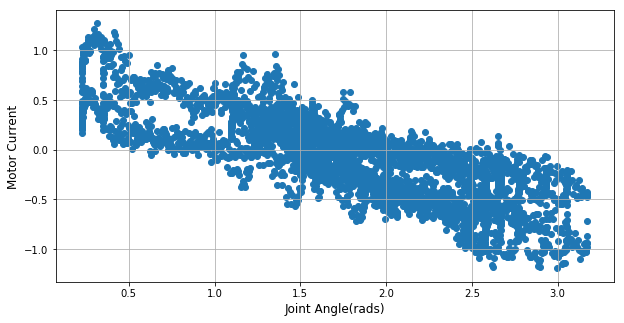

In [16]:
# a graph of time(t) and the current into the second joint(I2)
t = np.array(df_tr['q2'])
y = np.array(df_tr['I2'])
plt.figure(figsize=(10,5))
plt.figure(1) 
plt.scatter(t,y,lw=1)
plt.grid()
plt.xlabel('Joint Angle(rads)', fontsize=12)
plt.ylabel('Motor Current', fontsize=12)

# Fit a Linear Model
* 通过上面的步骤，从许多属性中挑选出一部分，建立多重线性模型
* 然后来看看模型预测的好不好：横坐标是真实的I2目标数据，纵坐标是用模型预测出的目标数据
* 黄色的线是斜率为1的对照线，发现线上和线下的点点数量差不多，所以这个模型还是比较合理的

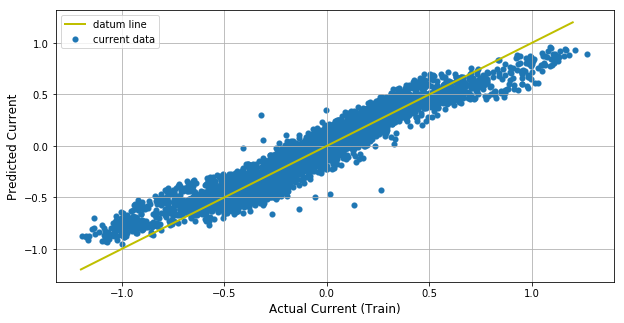

In [5]:
# create training data
X_tr = np.array(df_tr[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']])
y_tr = y
# create linear model
regr = linear_model.LinearRegression()
# train the model on training data 
regr.fit(X_tr,y_tr)
y_tr_pr = regr.predict(X_tr)
# a plot of predicted and actual current I2
plt.figure(figsize=(10,5))
plt.figure(1) 
plt.scatter(y_tr,y_tr_pr,linewidths=0.1,label='current data')
plt.grid()
plt.xlabel('Actual Current (Train)', fontsize=12)
plt.ylabel('Predicted Current', fontsize=12)

# datum line
plt.plot([-1.2,1.2],[-1.2,1.2],'y',linewidth=2,label='datum line')
# legend
plt.legend()

* 然后我们算了一下经过标准化的RSS（目标向量预测值与真实值之差的平方和的平均，再除以目标向量标准差）
* 标准化的过程是为了消除目标向量本身幅度对RSS大小产生的影响
* 这样标准化之后，RSS就只和模型本身得拟合程度有关系

In [6]:
# calculate the normalized RSS of training data
RSS_tr = np.mean((y_tr_pr-y_tr)**2)/(np.std(y_tr)**2)
print("The normalized RSS of training data is {0:f}".format(RSS_tr))

The normalized RSS of training data is 0.095833


# Measure the Fit on an Indepdent Dataset
* 上面的RSS是用训练模型用的数据，做出的预测值来计算得出的
* 为了判断这个模型是否真的fit，我们这里用另一组独立的测试数据，来检测一下模型
* 同样横坐标是真实数据，纵坐标是预测数据

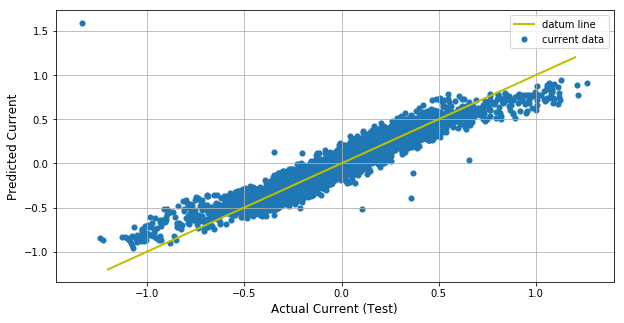

In [11]:
# load test data
df_te = pd.read_csv('/Users/Lovely-white/JupyterNotebook/'+
                    'Lab2 - Multiple Linear Regression/robot_test.csv',
                 header=None,names=names,na_values='?')
# create test data
X_te = np.array(df_te[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']])
y_te = np.array(df_te['I2'])
y_te_pr = regr.predict(X_te)
# a plot of predicted and actual current I2
plt.figure(figsize=(10,5))
plt.figure(1) 
plt.scatter(y_te,y_te_pr,linewidths=0.1,label='current data')
plt.grid()
plt.xlabel('Actual Current (Test)', fontsize=12)
plt.ylabel('Predicted Current', fontsize=12)
# datum line
plt.plot([-1.2,1.2],[-1.2,1.2],'y',linewidth=2,label='datum line')
# legend
plt.legend()

* 再次计算标准化RSS，发现比用训练数据算的RSS稍微大了一点，但是还是很小，可见模型还ok

In [13]:
# calculate the normalized RSS of test data
RSS_te = np.mean((y_te_pr-y_te)**2)/(np.std(y_te)**2)
print("The normalized RSS of testing data is {0:f}".format(RSS_te))

The normalized RSS of testing data is 0.126780


# Comparison

In [18]:
print("RSS_train = {0:8.6f}, RSS_test = {1:8.6f}".format(RSS_tr, RSS_te))
print("The normalized RSS of test data is just slightly higher "+
      "than that of training data,\n"+ 
      "so the multiple linear model above is a good fit")

RSS_train = 0.095833, RSS_test = 0.126780
The normalized RSS of test data is just slightly higher than that of training data,
so the multiple linear model above is a good fit
